In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('bmh')  # Use some nicer default colors
import random
from math import isnan
from math import pi, sin, cos
DEGREES_TO_RADIANS = pi / 180
LETTER_STRING = 'abcdefghij'

In [ ]:
def plot_coords(coords, bare_plot=False):
    if bare_plot:
        # Turns off the axis markers.
        plt.axis('off')
    # Ensures equal aspect ratio.
    plt.gca().set_aspect('equal', 'datalim')
    # Converts a list of coordinates into 
    # lists of X and Y values, respectively.
    X, Y = zip(*coords)
    # Draws the plot.
    plt.plot(X, Y)

In this function we can add evolution strategies. I've just added a very simple evolutionary strategy that is not very stochastic or good. It just replaces the value of the first key with 'FA'

In [ ]:
def point_mutation_transformation(transformations, key):
    '''
    change the value of a transformation based on letter
    '''
    # generate the letter that we want to change and the letter to replace it with
    old_letter = random.choice(LETTER_STRING).upper()
    #old_letter = transformations[key]
    new_letter = random.choice(LETTER_STRING).upper()
    print(old_letter, new_letter)
            
    # point mutation-like change of transformation rules
    old_transformation = transformations[key]
            
    # replace by other letter(s) random duplication
    #transformations[key] = old_transformation.replace(old_letter, random.randint(0,4)*new_letter) #CHANGE HERE
            
    # replace by other letter(s) for random amount of times with random duplication
    nr_letter = old_transformation.count(old_letter)
    transformations[key] = [letter.replace(old_letter, random.randint(0,4)*new_letter, random.randint(0, nr_letter)) for letter in old_transformation] #CHANGE HERE
            
    # remove all old_letter values
    #transformations[key] = old_transformation.replace(old_letter, '') #CHANGE HERE
            
    # if a new letter is added to the dict values that is not already a key, add it to the dict
    if new_letter not in transformations: 
        transformations[new_letter] = transformations[key] *3 #CHANGE HERE

In [ ]:
def is_letter(transformations, key, index):
    '''
    the key is a letter
    '''
    new_letter = random.choice(LETTER_STRING).upper()

    #string_conversion = list(transformations[key])
    #string_conversion[index] = new_letter
    #new_transformation = "".join(string_conversion)

    transformations[key][index] = new_letter

    # if a new letter is added to the dict values that is not already a key, add it to the dict
    if new_letter not in transformations: 
        transformations[new_letter] = transformations[key] *3 #CHANGE HERE

    return

In [ ]:
def is_bracket_left(transformations, key, index):
    '''
    the key is a left bracket
    '''
    pass

In [ ]:
def is_bracket_right(transformations, key, index):
    '''
    the key is a right bracket
    '''
    pass

In [ ]:
def is_plus_minus(transformations, key, index):
    '''
    the key is a plus or minus
    '''
    pass

In [ ]:
def evolve_transformations(transformations, p):
    '''
    loops over the transformations and changes them 
    '''
    keys = list(transformations.keys())
    # loop over keys from transformations dict and change the value of that key with chance p
    for i in range(len(keys)):
        if random.random() > p: 
            key = keys[i]
            
            point_mutation_transformation(transformations, key)
            '''
            # get random index in transformations key
            index = random.randint(0, len(transformations[key])-1)
            value = transformations[key][index]

            if value.isalpha(): is_letter(transformations, key, index)
            elif value == '[' : is_bracket_left(transformations, key, index)
            elif value == ']' : is_bracket_right(transformations, key, index)
            elif value == '+' or '-' : is_plus_minus(transformations, key, index)
            else: pass 
        	'''
    return transformations

In [ ]:
def transform_sequence(sequence, transformations, evolve=False):
    # print(transformations)
    keys_values = transformations.items()

    transformations = {key: str(value) for key, value in keys_values}
    print('before join', sequence)

    #sequence.replace(, )
    #for index, c in enumerate(sequence):
    #    sequence[index] = transformations.get(c, c)
    #sequence = ''.join(transformations.get(c, c) for c in sequence)
    print(type(sequence))
    sequence = [transformations.get(c, c) for c in sequence]

    print('trans', transformations)

    print('after join', sequence)

    print('dict type', type(transformations[keys] for keys in keys_values))
    #if evolve:
    #    sequence = sequence.split()
    return sequence
    #return [transformations.get(c, c) for c in sequence]

In [ ]:
def transform_multiple_evolve(sequence, transformations, iterations, p):
    '''Tranforms for multiple iterations'''
    for _ in range(iterations):
        #print(sequence, transformations, '\n')
        transformations = evolve_transformations(transformations, p)
        # print('sequence:', sequence)
        sequence = transform_sequence(sequence, transformations, evolve=True)
    print(type(sequence))
    #print('before join', sequence)
    sequence = ''.join(sequence)
    #print('after join', sequence)
    return sequence

In [ ]:
def transform_multiple(sequence, transformations, iterations):
    '''Tranforms for multiple iterations'''
    for _ in range(iterations):
        sequence = transform_sequence(sequence, transformations)
    return sequence

In [ ]:
def branching_turtle_to_coords(turtle_program, turn_amount=45):
    saved_states = list()
    state = (0, 0, 90)
    yield (0, 0)

    print('turtle', turtle_program)


    for command in turtle_program:
        x, y, angle = state

        if command.lower() in LETTER_STRING:        # Move forward (matches a-j and A-J)
            state = (x - cos(angle * DEGREES_TO_RADIANS),
                     y + sin(angle * DEGREES_TO_RADIANS),
                     angle)
            
            if command.islower():                  # Add a break in the line if command matches a-j
                yield (float('nan'), float('nan'))

            yield (state[0], state[1])

        elif command == '+':                       # Turn clockwise
            state = (x, y, angle + turn_amount)

        elif command == '-':                       # Turn counterclockwise
            state = (x, y, angle - turn_amount)

        elif command == '[':                       # Remember current state
            saved_states.append(state)

        elif command == ']':                       # Return to previous state
            state = saved_states.pop()
            yield (float('nan'), float('nan'))
            x, y, _ = state
            yield (x, y)

        # Note: We silently ignore unknown commands

In [ ]:
def l_plot_evolve(axiom, transformations, iterations=0, angle=45, p=0.5):
    turtle_program = transform_multiple_evolve(axiom, transformations, iterations, p)
    coords = branching_turtle_to_coords(turtle_program, angle)
    plot_coords(coords, bare_plot=True) # bare_plot removes the axis labels

In [ ]:
def l_plot(axiom, transformations, iterations=0, angle=45):
    turtle_program = transform_multiple(axiom, transformations, iterations)
    coords = branching_turtle_to_coords(turtle_program, angle)
    plot_coords(coords, bare_plot=True) # bare_plot removes the axis labels

Here you can see the difference between with and without evolution. If you run the evolve function a few times you'll see that it changes, the non-evolved one is deterministic. 

Why it doesn't work: The program replaces 'A' by a list: ['F',&nbsp;'[',&nbsp;'+',&nbsp;'A',&nbsp;'F',&nbsp;'-',&nbsp;'[',&nbsp;'A',&nbsp;']',&nbsp;'-',&nbsp;'-',&nbsp;'A',&nbsp;']',&nbsp;'[',&nbsp;'-',&nbsp;'-',&nbsp;'-',&nbsp;'A',&nbsp;']']. This creates a nested list: [['F',&nbsp;'[',&nbsp;'+',&nbsp;'A',&nbsp;'F',&nbsp;'-',&nbsp;'[',&nbsp;'A',&nbsp;']',&nbsp;'-',&nbsp;'-',&nbsp;'A',&nbsp;']',&nbsp;'[',&nbsp;'-',&nbsp;'-',&nbsp;'-',&nbsp;'A',&nbsp;']']] and our program does not look for nested lists. So, when we replace A, we need to remove the outer brackets of the list. We would need to flatten the list at every iteration, so it is easier to just use strings instead of lists. 

A B
F F
before join ['A']
<class 'list'>
trans {'F': "['F', 'F']", 'A': "['F', '[', '+', 'A', 'F', '-', '[', 'A', ']', '-', '-', 'A', ']', '[', '-', '-', '-', 'A', ']']", 'B': "['F', 'F', 'F', 'F', 'F', 'F']"}
after join ["['F', '[', '+', 'A', 'F', '-', '[', 'A', ']', '-', '-', 'A', ']', '[', '-', '-', '-', 'A', ']']"]
dict type <class 'generator'>
E I
I J
before join ["['F', '[', '+', 'A', 'F', '-', '[', 'A', ']', '-', '-', 'A', ']', '[', '-', '-', '-', 'A', ']']"]
<class 'list'>
trans {'F': "['F', 'F']", 'A': "['F', '[', '+', 'A', 'F', '-', '[', 'A', ']', '-', '-', 'A', ']', '[', '-', '-', '-', 'A', ']']", 'B': "['F', 'F', 'F', 'F', 'F', 'F']", 'I': "['F', 'F', 'F', 'F', 'F', 'F']", 'J': "['F', '[', '+', 'A', 'F', '-', '[', 'A', ']', '-', '-', 'A', ']', '[', '-', '-', '-', 'A', ']', 'F', '[', '+', 'A', 'F', '-', '[', 'A', ']', '-', '-', 'A', ']', '[', '-', '-', '-', 'A', ']', 'F', '[', '+', 'A', 'F', '-', '[', 'A', ']', '-', '-', 'A', ']', '[', '-', '-', '-', 'A', ']']"}
after join [

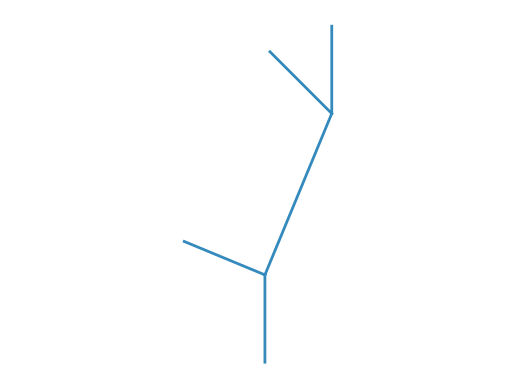

In [ ]:
l_plot_evolve(['A'], {'F': ['F', 'F'], 'A': ['F', '[', '+', 'A', 'F', '-', '[', 'A', ']', '-', '-', 'A', ']', '[', '-', '-', '-', 'A', ']']}, 2
, 22.5)

before join A
<class 'str'>
trans {'F': 'FF', 'A': 'F[+AF-[A]--A][---A]'}
after join ['F[+AF-[A]--A][---A]']
dict type <class 'generator'>
before join ['F[+AF-[A]--A][---A]']
<class 'list'>
trans {'F': 'FF', 'A': 'F[+AF-[A]--A][---A]'}
after join ['F[+AF-[A]--A][---A]']
dict type <class 'generator'>
before join ['F[+AF-[A]--A][---A]']
<class 'list'>
trans {'F': 'FF', 'A': 'F[+AF-[A]--A][---A]'}
after join ['F[+AF-[A]--A][---A]']
dict type <class 'generator'>
before join ['F[+AF-[A]--A][---A]']
<class 'list'>
trans {'F': 'FF', 'A': 'F[+AF-[A]--A][---A]'}
after join ['F[+AF-[A]--A][---A]']
dict type <class 'generator'>
before join ['F[+AF-[A]--A][---A]']
<class 'list'>
trans {'F': 'FF', 'A': 'F[+AF-[A]--A][---A]'}
after join ['F[+AF-[A]--A][---A]']
dict type <class 'generator'>
turtle ['F[+AF-[A]--A][---A]']


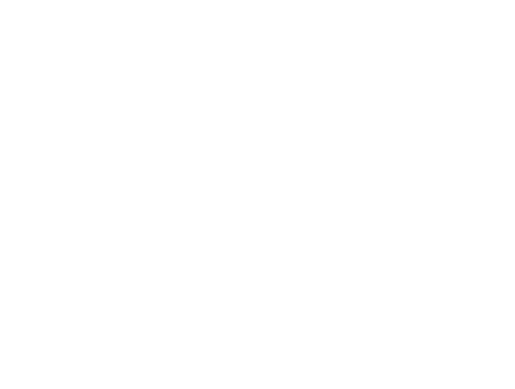

In [ ]:
l_plot('A', {'F': 'FF', 'A': 'F[+AF-[A]--A][---A]'}, 5, 22.5)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=48486dc9-a1a6-4dac-ab77-4156e0b947fb' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>